# Building and analysing a paper co-authorship network

In [5]:
import graph_tool_extras as gte
from pathlib import Path

import distribution as dst

from itertools import combinations
from random import random

from math import log

## Introduction

In this notebook, a network of co-authorship of papers about condensed matter authors was built. The database in the file below is used. It's from the Stanford Network Analysis Project's dataset at https://networks.skewed.de/net/arxiv_authors#CondMat_draw.

In [6]:
FOLDER_PATH = Path.cwd() / 'archive'
EDGES_FILE_PATH = FOLDER_PATH / 'musae_git_edges.csv'

## Understanding the data

| Concept of vertices                                                                                                 | Concept of edges                                                                                                                             | Operationalization of vertices                                                                                                                                                                                                                                                           | Operationalization of edges                                                                                                                                                                                                                                                  |
|---------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Webpage                                                                                                             | An edge between i and j indicates co-authorship between i and j.                                                                           | Each vertex represents an author of a paper in the cond-mat category on the arXiv platform. The data was collected from January 1993 to April 2003.                                                                                                                                 | An edge between authors i and j indicates a co-authorship relationship between them. In cases where other k authors also contributed to the production of the paper, these additional k authors are connected to both authors i and j, as well as to each other, through edges. |


## Creating functions to build the network

In [7]:
def get_or_add_vertex(g, id):
    u = g.vertex_by_id(id)
    if u is None:
        u = g.add_vertex_by_id(id)
    return u

In [8]:
def get_or_add_edge(g, author_a, author_b):
    e = g.edge_by_ids(author_a, author_b)
    if e is None:
        e = g.add_edge_by_ids(author_a, author_b)
    return e

## Reading the data and building the network

In [9]:
g = gte.Graph(directed=False)

In [10]:
with open(EDGES_FILE_PATH) as file:

    next(file)
    
    for line in file:
        parts = line.split(',')

        author_a = parts[0]
        author_b = parts[1].replace('\n', '')
        
        vertex_a = get_or_add_vertex(g, author_a)
        vertex_b = get_or_add_vertex(g, author_b)
        edge = get_or_add_edge(g, author_a, author_b)

In [11]:
g = gte.clean(g)

In [12]:
gte.save(g, 'github_social.net.gz')

## Configuring the layout and rendering the network

In [13]:
from graph_tool import draw
import netpixi

In [14]:
layout = draw.sfdp_layout(g)

In [15]:
gte.move(g, layout)

In [16]:
gte.save(g, 'github_social_layout.net.gz')

In [17]:
r = netpixi.render('github_social_layout.net.gz', infinite=True)

## Improving network vizualization

In [24]:
r.vertex_default(
    size=1,
    color=0xff7700,
    bwidth=0.2,
    bcolor=0x0000ff,
)

In [19]:
r.edge_default(
    width=0.2,
    color=0xffffff,
    curve1=0,
    curve2=0,
)

## Analyzing the network

In [25]:
g.density()

0.04

In [26]:
g.transitivity()

1.24

In [27]:
degrees = g.get_total_degrees()

In [28]:
degrees.describe()

count    37700.000000
mean        15.331724
std         80.788102
min          1.000000
25%          2.000000
50%          6.000000
75%         13.000000
max       9458.000000
dtype: float64

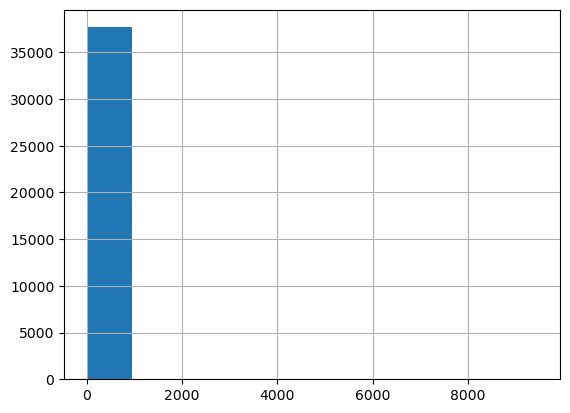

In [29]:
degrees.hist();

In [30]:
dst.not_normal(degrees)

0.0

In [31]:
dst.more_powerlaw_than_lognormal(degrees)

Calculating best minimal value for power law fit


/usr/local/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


(False, 0.13056102246262724)

In [32]:
dst.more_powerlaw_than_exponential(degrees)

Calculating best minimal value for power law fit


(True, 1.8242293151011604e-07)

In [ ]:
distances = g.get_distances()

In [ ]:
distances.describe()

In [ ]:
distances.hist();

In [ ]:
log(g.num_vertices())